In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import bokeh
output_notebook()

Loading BokehJS ...

In [3]:
%run ./_EvaluationUtil.ipynb

In [4]:
nomeModelo = 'publico-COMPLETO.bin'
pathModelo = os.path.join('..', '..', 'resources', 'Modelos', nomeModelo)
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(pathModelo)

In [5]:
# Processa analogia no espaço semântico.
# Uso: A está para B, assim como C está para <x>
def getAnalogy(model, a, b , c):
    result = model.most_similar(negative=[a], 
                                positive=[b, c],
                                topn=1)
    return result[0][0]

In [6]:
# Processa analogia no espaço semântico.
# Uso: A está para B, assim como C está para <x>
def getAnalogyTopN(model, a, b , c):
    results = model.most_similar(negative=[a], 
                                positive=[b, c],
                                topn=5)
    
    listAnalogies = [result[0] for result in results]
    lista = ", ".join([result for result in listAnalogies])
    
    return lista

In [7]:
getAnalogyTopN(model, 'reservatorio', 'reservoir', 'exploracao')

'exploration, exploratory, exploitation, dowstream, activities'

In [8]:
def pp(obj):
    print(pd.DataFrame(obj).to_string())

#### Recursos e referências
- http://www.anp.gov.br/exploracao-e-producao-de-oleo-e-gas/gestao-de-contratos-de-e-p/fase-de-producao/planos-de-desenvolvimento

In [10]:
getAnalogy(model, 'fogo', 'calor', 'resfriador')

'condensador'

In [11]:
getAnalogy(model, 'bop', 'riser', 'pig')

'duto'

In [62]:
getAnalogy(model, 'bop', 'equipamento', 'gasolina')

[('combustivel', 0.6594356298446655)]

In [64]:
getAnalogy(model, 'santos', 'campos', 'marlim')

[('albacora', 0.6160534620285034)]

In [66]:
getAnalogy(model, 'vegetal', 'flora', 'animal')

[('fauna', 0.6815118789672852)]

In [113]:
getAnalogy(model, 'aratu', 'reconcavo', 'guamare')

[('potiguar', 0.6457458734512329)]

In [68]:
getAnalogy(model, 'aratu', 'ba', 'guamare')

[('rn', 0.6638747453689575)]

In [69]:
getAnalogy(model, 'buzios', 'santos', 'furado')

[('sergipealagoas', 0.5945425033569336)]

In [112]:
getAnalogy(model, 'buzios', 'petrobras', 'peregrino')

[('statoil', 0.691356897354126)]

In [ ]:
### Implementando analogias completas e gráficos

In [12]:
def getAnalogyList(model, wordA, wordB, listWordC):
    listAnalogies = [getAnalogy( model, wordA, wordB, wordC) for wordC in listWordC]
    return listAnalogies

In [13]:
def getAnalogyListTopN(model, wordA, wordB, listWordC):
    listAnalogies = [getAnalogyTopN( model, wordA, wordB, wordC) for wordC in listWordC]
    return listAnalogies

In [411]:
listWordC = ['pig', 'anm', 'broca', 'flare', 'choke', 'valvula', 'sonda']
listaAnalogias = getAnalogyList(model, 'bop', 'riser', listWordC)
pp(zip(listWordC,listaAnalogias))

         0          1
0      pig       duto
1      anm  tubulacao
2    broca       tubo
3    flare       vent
4    choke       duto
5  valvula       duto
6    sonda       boia


In [478]:
listWordC = ['exploracao', 'producao', 'perfuracao', 'sismica', 'campo', 'bacia', 
             'plataforma', 'oleo', 'hidrocarboneto', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao', 'temperatura' , 'arenito', 'sal', 'carvao']
listaAnalogias = getAnalogyList(model, 'reservatorio', 'reservoir', listWordC)
pp(zip(listWordC,listaAnalogias))

                 0             1
0       exploracao   exploration
1         producao    production
2       perfuracao      drilling
3          sismica       seismic
4            campo         field
5            bacia         basin
6       plataforma      platform
7             oleo           oil
8   hidrocarboneto   hydrocarbon
9      combustivel          fuel
10            duto          pipe
11           rocha          rock
12           falha         fault
13            poco         wells
14      porosidade      porosity
15  permeabilidade  permeability
16     viscosidade     viscosity
17         pressao      pressure
18     temperatura   temperature
19         arenito     sandstone
20             sal          salt
21          carvao         coals
22            fpso         field


In [522]:
listWordC = ['iran', 'noruega', 'nigeria', 'angola']
listaAnalogias = getAnalogyList(model, 'russia', 'asia', listWordC)
pp(zip(listWordC,listaAnalogias))

         0       1
0     iran   asian
1  noruega  europa
2  nigeria  africa
3   angola  africa


### Exemplos selecionados

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
def plotAnalogies(wordA, wordB, listWordC, listaAnalogias):
    labels = ([wordA]+ listWordC) + ([wordB] + listaAnalogias)
    orig_data = [model[w] for w in labels]
    
    pca = PCA(n_components=2, random_state=0)
    data = pca.fit_transform(orig_data)
    #tsne = TSNE(n_components=2, random_state=0, perplexity=12,early_exaggeration=10 )
    #data = tsne.fit_transform(orig_data)
    
    plt.rc('lines', linewidth=10)
    plt.style.use('seaborn-white')
    plt.figure(figsize=(18, 10), dpi=100)
    plt.plot(data[:,0], data[:,1], '.', alpha=0.5)
    #plt.tight_layout()
    x1,x2,y1,y2 = plt.axis()
    #plt.axis((x1+4,x2-2,y1,y2-1))
    plt.axis((x1+1,x2+2,y1,y2))
    
    #plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
    
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                lw=1, color="gray",
                                alpha=0.5,
                                connectionstyle="arc3")
        )
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i], fontsize=18,)
        

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
def plotAnalogies_filterPlot(wordA, wordB, listWordC, listaAnalogias, filtered):
    labels = ([wordA]+ listWordC) + ([wordB] + listaAnalogias)
    orig_data = [model[w] for w in labels]
    
    pca = PCA(n_components=2, random_state=0)
    data = pca.fit_transform(orig_data)
    #tsne = TSNE(n_components=2, random_state=0, perplexity=12,early_exaggeration=10 )
    #data = tsne.fit_transform(orig_data)
    
    plt.rc('lines', linewidth=10)
    plt.style.use('seaborn-white')
    plt.figure(figsize=(18, 10), dpi=100)
    plt.plot(data[:,0], data[:,1], '.', alpha=0.5)
    #plt.tight_layout()
    x1,x2,y1,y2 = plt.axis()
    #plt.axis((x1+4,x2-2,y1,y2-1))
    plt.axis((x1+1,x2+2,y1,y2))
    
    #plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
    
    for i in range(len(data)//2):
        if (labels[i] not in filtered):
            plt.annotate("",
                    xy=data[i],
                    xytext=data[i+len(data)//2],
                    arrowprops=dict(arrowstyle="->",
                                    lw=1, color="gray",
                                    alpha=0.5,
                                    connectionstyle="arc3")
                         
             
        )
    for i in range(len(data)):
        if (labels[i] not in filtered):
            plt.annotate(labels[i], xy = data[i], fontsize=18,)
        

                 0             1
0       exploracao   exploration
1       perfuracao      drilling
2          sismica       seismic
3            bacia         basin
4       plataforma      platform
5             oleo           oil
6      combustivel          fuel
7             duto          pipe
8            rocha          rock
9            falha         fault
10            poco         wells
11      porosidade      porosity
12  permeabilidade  permeability
13     viscosidade     viscosity
14         pressao      pressure
15         arenito     sandstone
16             sal          salt


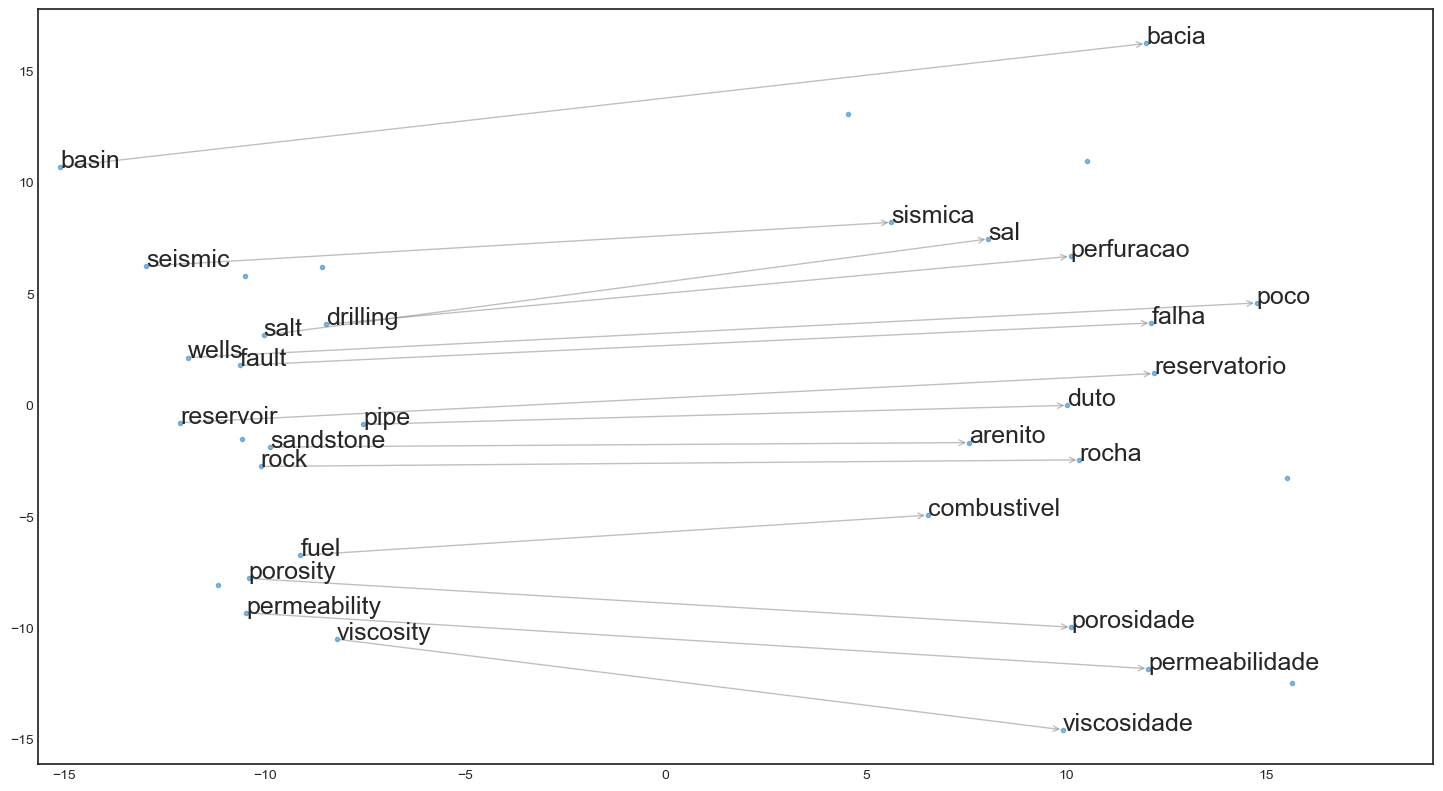

In [37]:
# Filtrando os resultados que serão plotados no gráfico, para diminuir o ruído
listWordC = [
             'exploracao',  
             'perfuracao', 'sismica', 'bacia', 
             'plataforma', 
             'oleo', 'combustivel', 
             'duto',
             'rocha', 
             'falha', 
             'poco', 
             'porosidade', 
             'permeabilidade', 'viscosidade',
             'pressao', 
             'arenito', 'sal', ]

filtered = ['exploracao', 'exploration', 'pressao', 'pressure', 'oil', 'oleo', 'platform', 'plataforma']

#'frequencia', 'brasil', 'onda','sedimento', 'injecao', 'vazamento', 'presal'

wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies_filterPlot(wordA, wordB,listWordC, listaAnalogias, filtered)

                 0             1
0       exploracao   exploration
1       perfuracao      drilling
2          sismica       seismic
3            bacia         basin
4       plataforma      platform
5             oleo           oil
6      combustivel          fuel
7             duto          pipe
8            rocha          rock
9            falha         fault
10            poco         wells
11      porosidade      porosity
12  permeabilidade  permeability
13     viscosidade     viscosity
14         pressao      pressure
15         arenito     sandstone
16             sal          salt


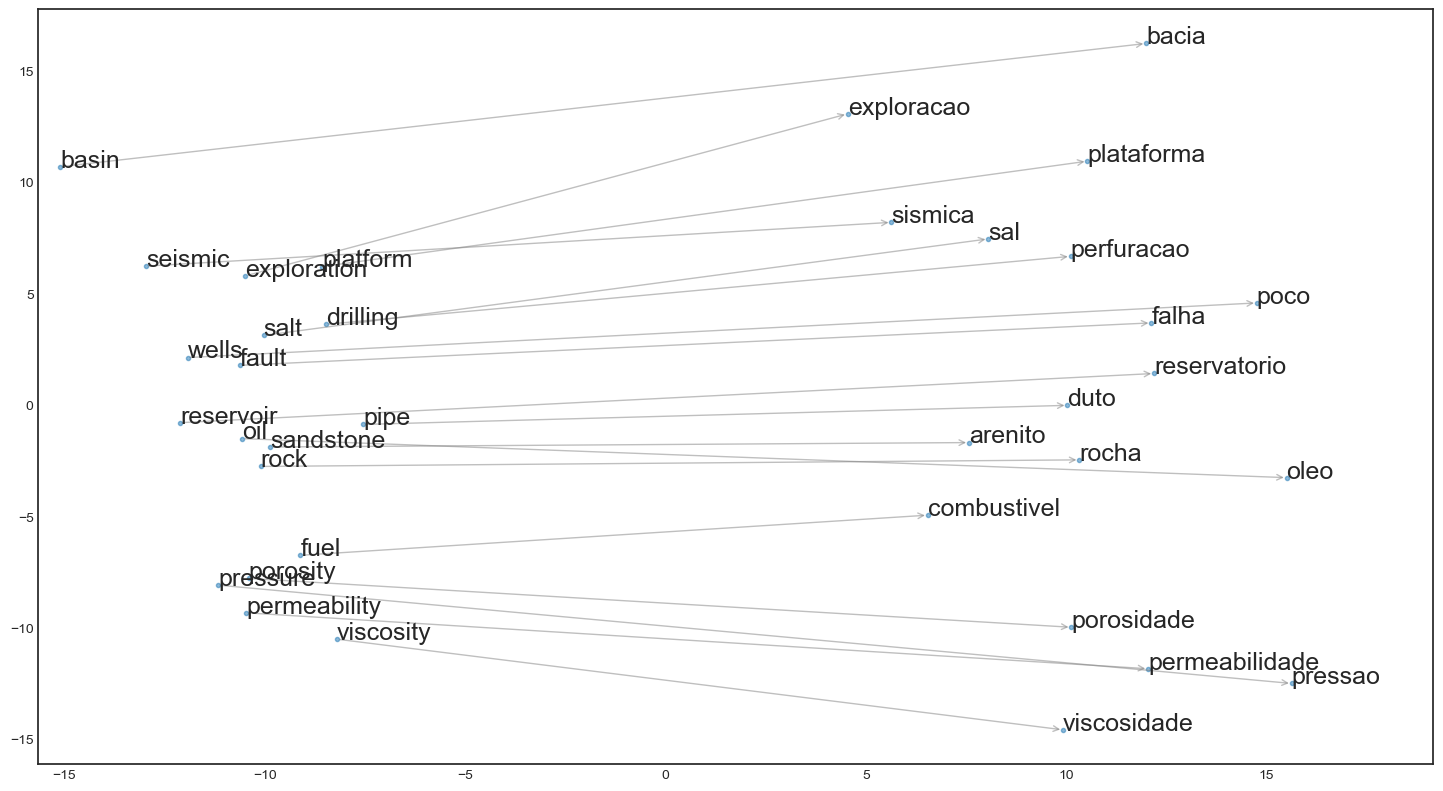

In [51]:
# aumentando tamanho da fonte das palavras
listWordC = ['exploracao',  
             'perfuracao', 'sismica', 'bacia', 
             'plataforma', 
             'oleo', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao' , 'arenito', 'sal', ]
#'frequencia', 'brasil', 'onda','sedimento', 'injecao', 'vazamento', 'presal'

wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

In [30]:
# direção inversa das analogias
listWordC = ['exploration', 'drilling', 'seismic', 'basin', 'platform', 'oil', 'fuel', 'pipe', 'rock', 'fault', 'wells', 'porosity', 'permeability', 'viscosity', 'pressure', 'sandstone', 'salt', 'brazil']
wordA='reservoir'
wordB = 'reservatorio'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)

['poco', 'poco', 'sismica', 'bacia', 'plataforma', 'oleo', 'combustivel', 'duto', 'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade', 'pressao', 'arenito', 'sal', 'sul']


                 0             1
0       exploracao   exploration
1       perfuracao      drilling
2          sismica       seismic
3            bacia         basin
4       plataforma      platform
5             oleo           oil
6      combustivel          fuel
7             duto          pipe
8            rocha          rock
9            falha         fault
10            poco         wells
11      porosidade      porosity
12  permeabilidade  permeability
13     viscosidade     viscosity
14         pressao      pressure
15         arenito     sandstone
16             sal          salt


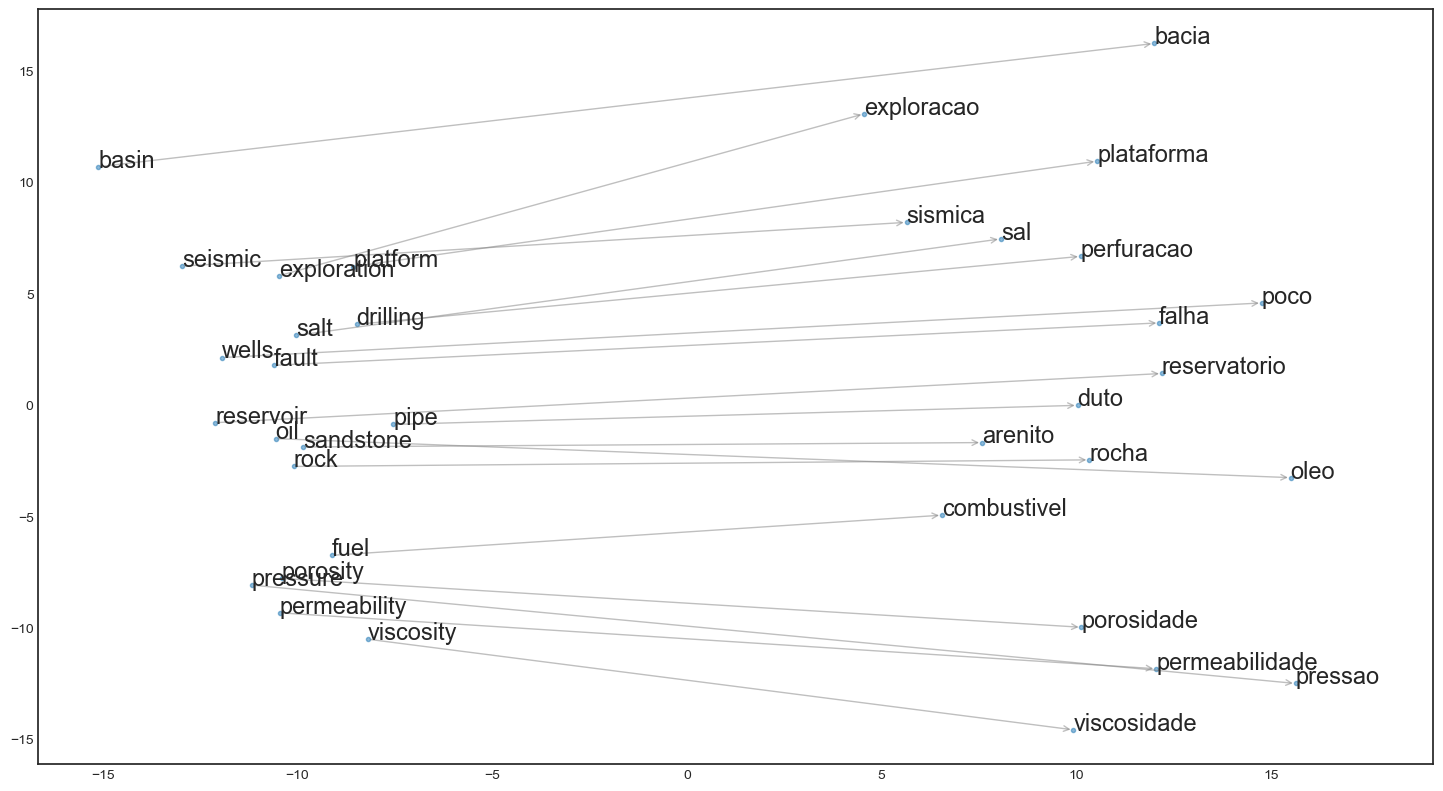

In [30]:
listWordC = ['exploracao',  'perfuracao', 'sismica', 'bacia', 
             'plataforma', 'oleo', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao' , 'arenito', 'sal']
wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

In [41]:
listWordC = ['exploration', 'production', 'drilling', 'seismic', 'field', 'basin', 'platform', 'oil', 'hydrocarbon', 'fuel', 'pipe', 'rock', 'fault', 'wells', 'porosity', 'permeability', 'viscosity', 'pressure', 'sandstone', 'salt', 'sediment', 'brazil']
wordB = 'reservatorio'
wordA='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)
listaAnalogias = getAnalogyListTopN(model, wordA, wordB, listWordC)

for i in range(len(listaAnalogias)):
#for item in listaAnalogias:
    #print(item)
    print(listWordC[i], ' - ', listaAnalogias[i])

['poco', 'producao', 'poco', 'sismica', 'campo', 'bacia', 'plataforma', 'oleo', 'hidrocarboneto', 'combustivel', 'duto', 'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade', 'pressao', 'arenito', 'sal', 'sedimento', 'sul']
exploration  -  poco, pocos, exploracao, acumulacoes, subsolo
production  -  producao, erupcao, produzido, poco, injecao
drilling  -  poco, perfuracao, completacao, perfurando, pocos
seismic  -  sismica, sismico, sismicas, acustica, poco
field  -  campo, poco, furo, pocos, jazida
basin  -  bacia, subbacia, bacias, canion, lago
platform  -  plataforma, poco, monocoluna, platafor, submarino
oil  -  oleo, condensado, petroleo, caso, represado
hydrocarbon  -  hidrocarboneto, hidrocarbonetos, rocha, trapa, oleo
fuel  -  combustivel, motor, ignicao, fuelfired, oleo
pipe  -  duto, revestimento, tubulacao, tubo, anular
rock  -  rocha, encaixante, subsuperficie, fluido, rochareservatorio
fault  -  falha, falhas, falhamento, fraturas, transcorrente
wells  -

In [37]:
listWordC = ['exploracao', 'producao', 'perfuracao', 'sismica', 'campo', 'bacia', 
             'plataforma', 'oleo', 'hidrocarboneto', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao', 'arenito', 'sal', 'sedimento', 'brasil']
wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)
#for item in listaAnalogias:
#    print(item)

['exploration', 'production', 'drilling', 'seismic', 'field', 'basin', 'platform', 'oil', 'hydrocarbon', 'fuel', 'pipe', 'rock', 'fault', 'wells', 'porosity', 'permeability', 'viscosity', 'pressure', 'sandstone', 'salt', 'sediment', 'brazil']


                 0             1
0       exploracao   exploration
1         producao    production
2       perfuracao      drilling
3          sismica       seismic
4            campo         field
5            bacia         basin
6       plataforma      platform
7             oleo           oil
8      combustivel          fuel
9             duto          pipe
10           rocha          rock
11           falha         fault
12            poco         wells
13      porosidade      porosity
14  permeabilidade  permeability
15     viscosidade     viscosity
16         pressao      pressure
17     temperatura   temperature
18         arenito     sandstone
19             sal          salt
20          carvao         coals


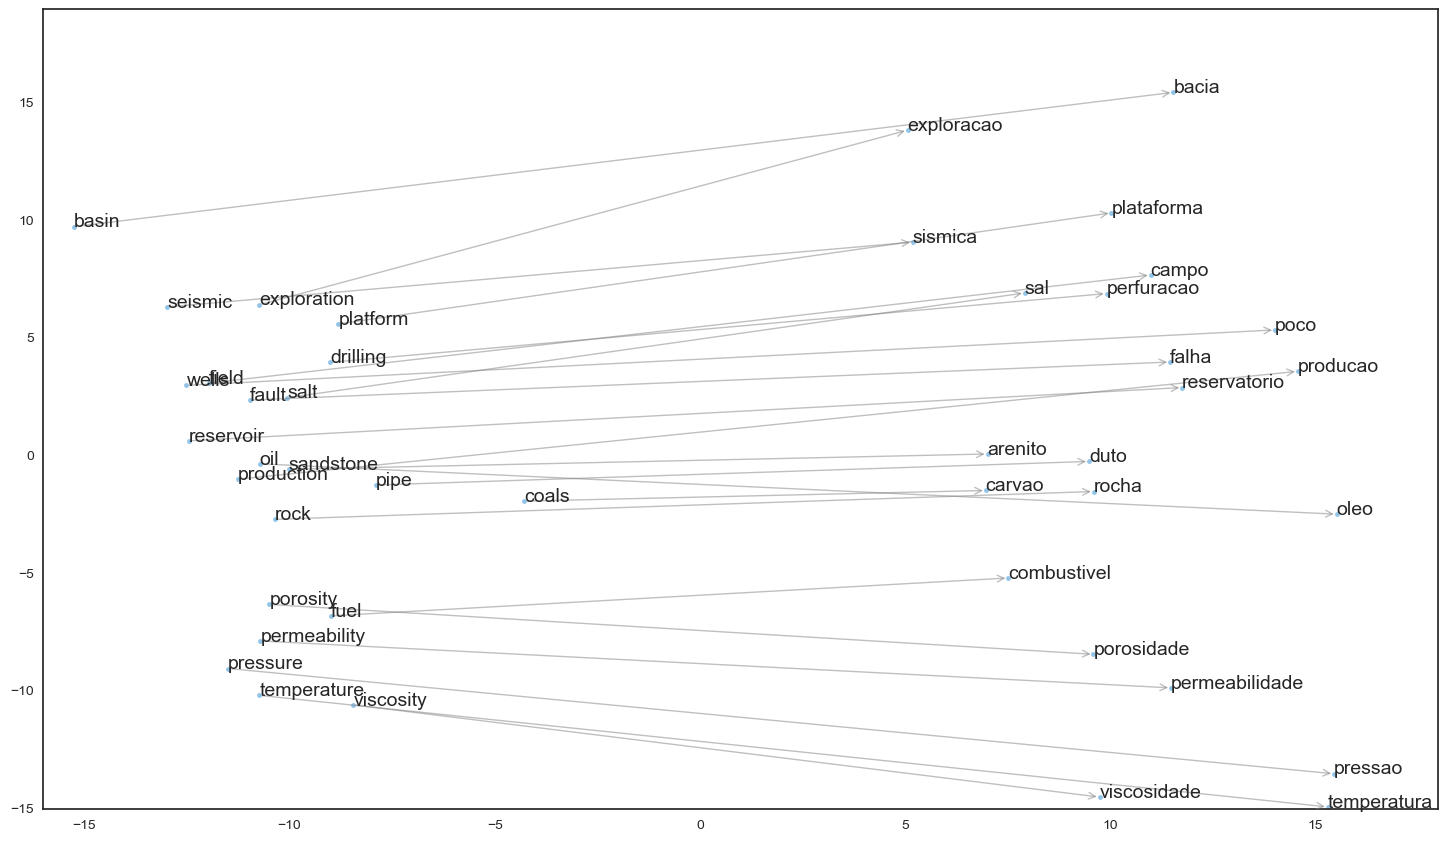

In [243]:
listWordC = ['exploracao', 'producao', 'perfuracao', 'sismica', 'campo', 'bacia', 
             'plataforma', 'oleo', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao', 'temperatura' , 'arenito', 'sal', 'carvao']
wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

In [ ]:
# Operações de tradução para contra-exemplos, retornando mais de um elemento para o vetor resultante

In [130]:
## Original Completo
listWordC = [ 'batimetria', 'particula', 'completacao', 'navio', 'argila', 'poros', 'geofisica', 'cimentacao', 'prospeccao', 'condutividade',
             'ancora', 'camada', 'sonda', 'gravimetria', 'enxofre', 'carvao', 'asfalto', 'estimativa', 'risco',
            'frequencia', 'brasil', 'onda','sedimento', 'injecao', 'vazamento', 'presal' ]

,

wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyListTopN(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))

                0                                                                            1
0      batimetria                                depth, seismic, spatial, bathymetric, profile
1       particula                              frsg, droplet, particle, parameter, evaporating
2     completacao                                well, completion, drilling, wells, operations
3           navio                                         moored, ship, operations, fsrv, site
4          argila                                  cal3, spmint, caulinitica, wiu, bentonitica
5           poros                                     melim, vuggy, pore, micropores, we11bore
6       geofisica                                seismic, geopro, sulfabras, anp43, etnografia
7      cimentacao                     completion, cementing, cementation, washouts, fracturing
8      prospeccao                   seismic, exploration, exploratory, interpretation, finacao
9   condutividade             permeability, densit

                0               1
0         pressao       manometro
1     comprimento      micrometro
2      velocidade       tacometro
3      porosidade     porosimetro
4       densidade      densimetro
5        corrente      multimetro
6          volume          bureta
7           tempo      cronometro
8         direcao         bussola
9          tensao    extensometro
10       radiacao       pirometro
11       altitude       altimetro
12       potencia   potenciometro
13  condutividade  condutivimetro
14  resistividade    cintilometro
15        calibre      paquimetro


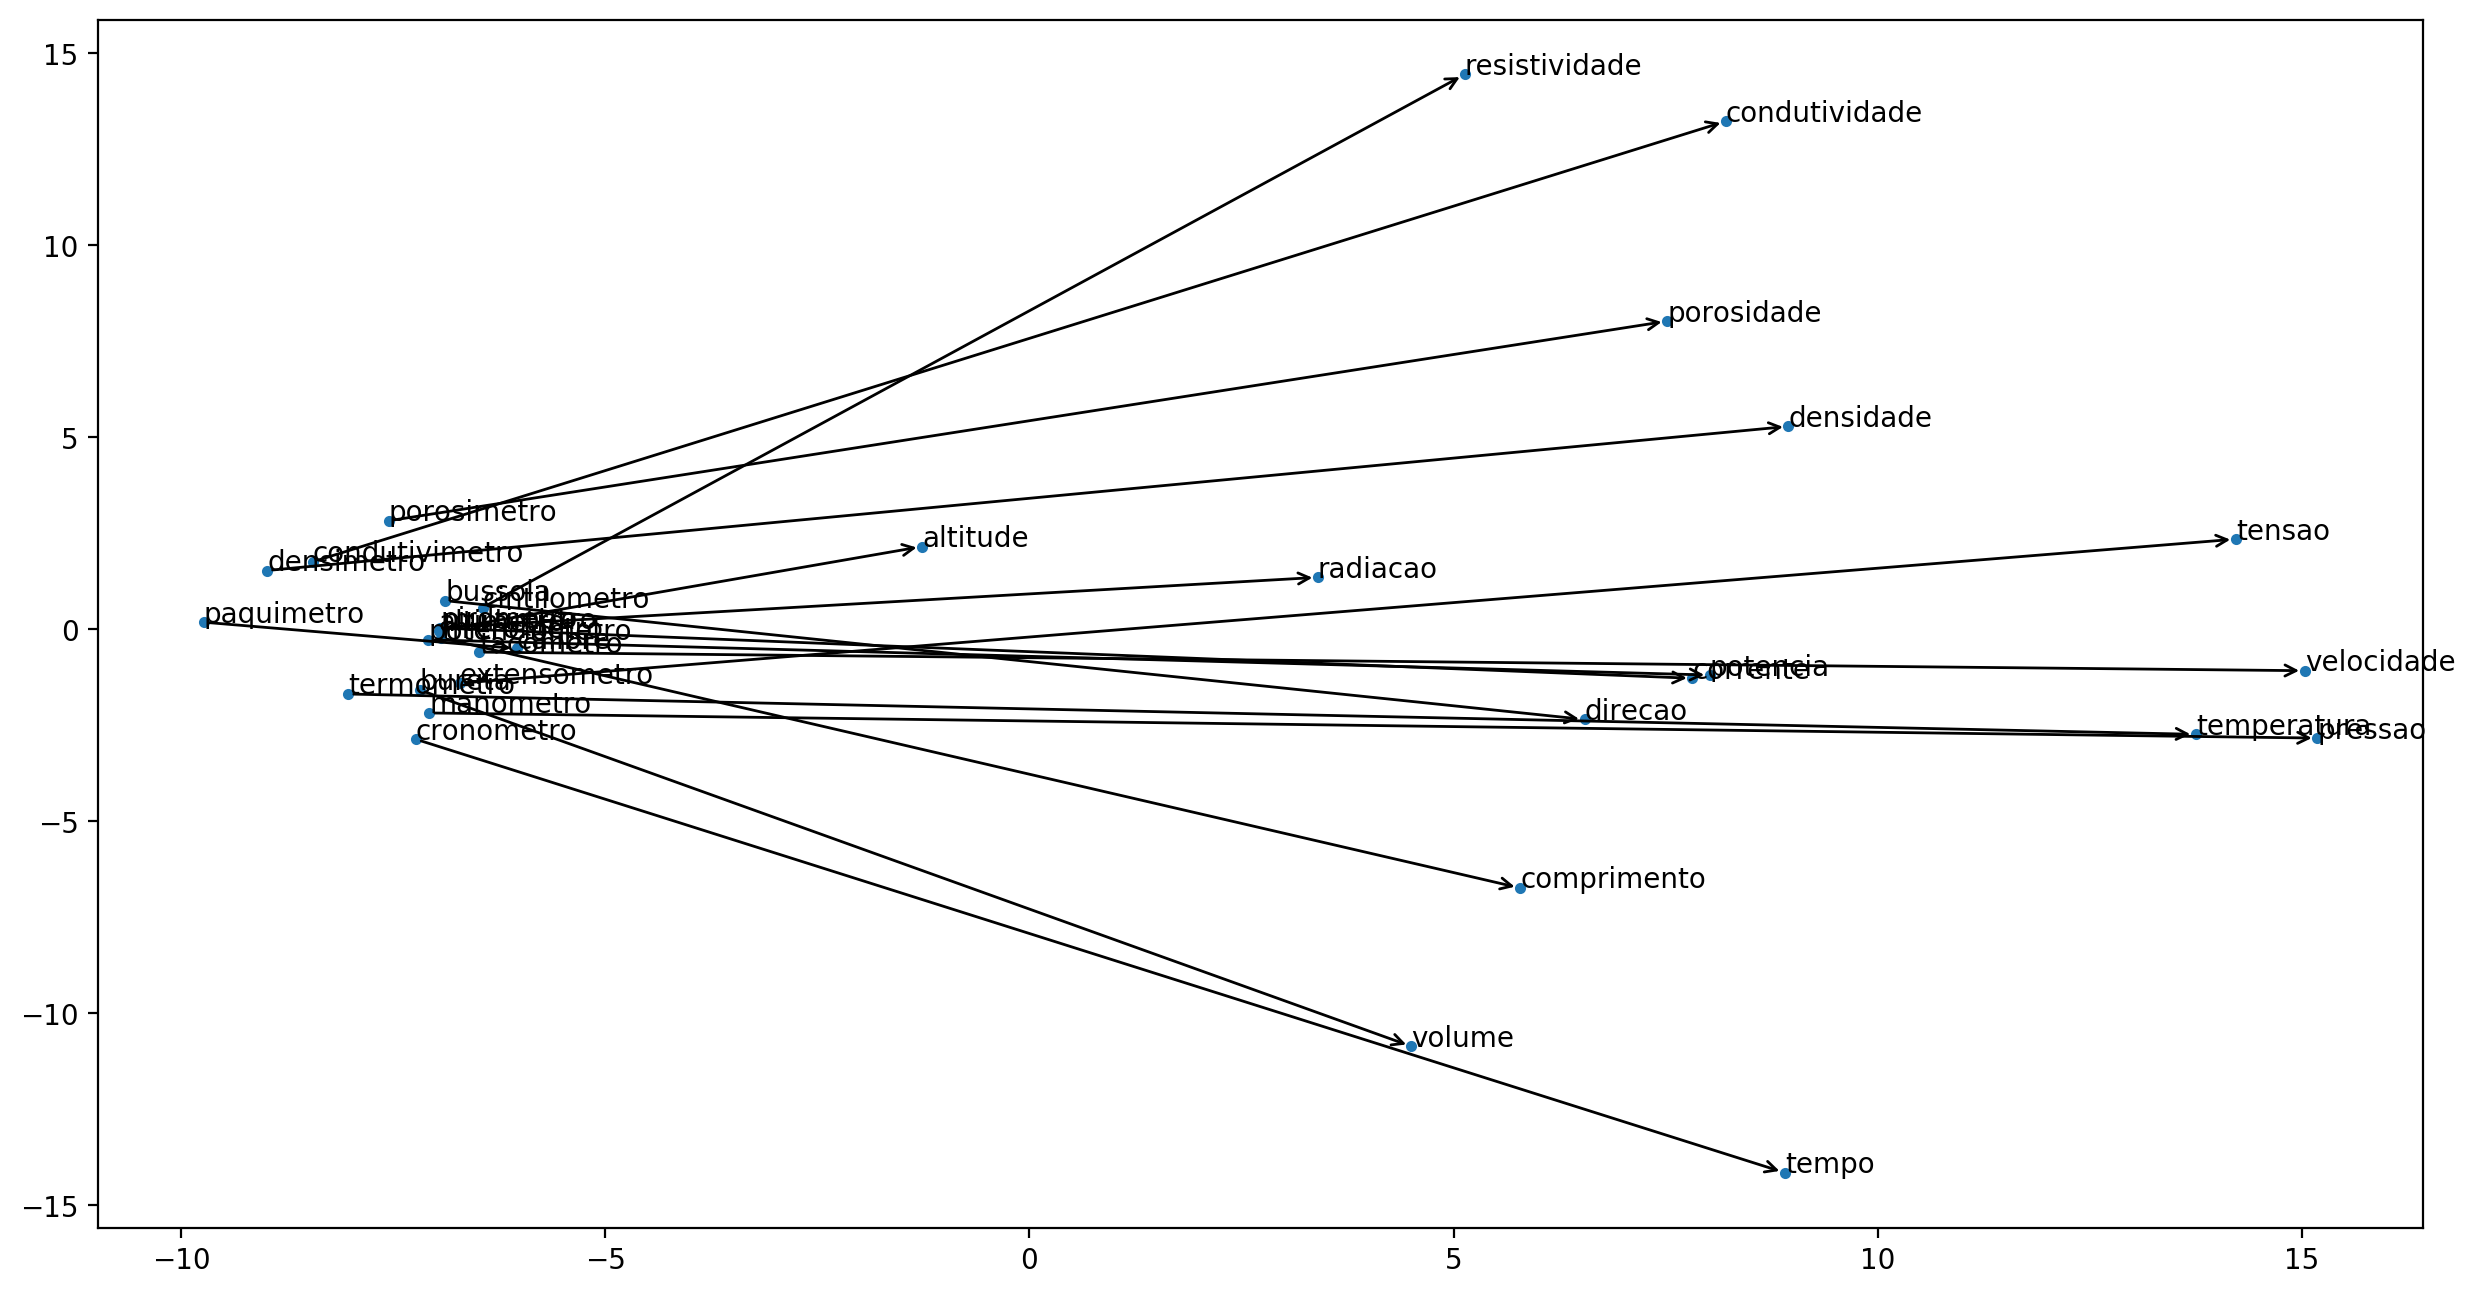

In [315]:
listWordC = ['pressao', 'comprimento', 'velocidade', 'porosidade', 'densidade', 'corrente',
             'volume', 'tempo', 'direcao', 'tensao', 'radiacao', 'altitude', 'potencia',
            'condutividade', 'resistividade', 'calibre']
wordA = 'temperatura'
wordB='termometro'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

In [ ]:
## Analogias reversas

In [44]:
listWordC = ['manometro', 'bureta', 'bussola', 'porosimetro', 'densimetro', 'multimetro']
wordA = 'termometro'
wordB='temperatura'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)
listaAnalogias = getAnalogyListTopN(model, wordA, wordB, listWordC)

for i in range(len(listaAnalogias)):
#for item in listaAnalogias:
    #print(item)
    print(listWordC[i], ' - ', listaAnalogias[i])

['pressao', 'saturacao', 'velocidade', 'saturacao', 'densidade', 'voltagem']
manometro  -  pressao, vazao, saida, saturacao, velocidade
bureta  -  saturacao, mistura, fracao, vazao, massa
bussola  -  velocidade, inclinacao, magnetizacao, magnetico, rotacao
porosimetro  -  saturacao, porosidade, compressibilidade, permeabilidade, densidade
densimetro  -  densidade, viscosidade, velocidade, massa, peratura
multimetro  -  voltagem, velocidade, tensao, corrente, frequencia


In [45]:
listWordC = ['geofisico', 'engenheiro', 'quimico', 'gestor', 'oceanografo', 'enfermeiro']
wordA = 'geologo'
wordB='geologia'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)

['geofisica', 'engenharia', 'quimica', 'gestao', 'oceanografia', 'enfermagem']


In [46]:
listWordC = ['geofisica', 'engenharia', 'quimica', 'gestao', 'oceanografia', 'enfermagem']
wordA = 'geologia'
wordB='geologo'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
print(listaAnalogias)
listaAnalogias = getAnalogyListTopN(model, wordA, wordB, listWordC)

for i in range(len(listaAnalogias)):
#for item in listaAnalogias:
    #print(item)
    print(listWordC[i], ' - ', listaAnalogias[i])

['geofisico', 'engenheiro', 'quimico', 'gerente', 'doris', 'executante']
geofisica  -  geofisico, geologos, geologa, consultora, depex
engenharia  -  engenheiro, segen, estagiario, supervisor, consultora
quimica  -  quimico, mota, quimicas, qufmica, medicamentosa
gestao  -  gerente, endomarketing, equipe, gestor, analista
oceanografia  -  doris, professor, mestrando, suplente, geologa
enfermagem  -  executante, bibliotecario, avaliador, equipe, enfermeiro


In [24]:
listWordC = ['arenito', 'argilito', 'dolomito', 'evaporito', 'hornblenda', 'anidrita', 'argilito']
wordA='siltito'
wordB = 'silte'
listaAnalogias = getAnalogyListTopN(model, wordA, wordB, listWordC)
print(listaAnalogias)

['areia, granulometria, areias, argila, grossos', 'siltosa, siltica, areia, silticas, calhaus', 'siltosa, siltica, lamosa, detriticas, caulinitas', 'terrigena, cascalho, infiltrada, argila, inconsolidada', 'plagioclasio, augita, plagioclasios, feldspatos, epidoto', 'precipitacao, calcio, esmectita, ilita, magnesianas', 'siltosa, siltica, areia, silticas, calhaus']


## Analogias comparativas com modelo do NILC

In [52]:
nomeModelo = 'nilc.txt.model'
pathModelo = os.path.join('..', '..', 'resources', 'Modelos', nomeModelo)
#model = gensim.models.Word2Vec.load(pathModelo)
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(pathModelo)

In [20]:
listWordC = ['pressão', 'volume', 'direção', 'porosidade', 'densidade', 'corrente']
wordA = 'temperatura'
wordB='termômetro'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
#plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

            0              1
0     pressão        apetite
1      volume        negócio
2     direção          c-leg
3  porosidade     dielétrico
4   densidade  dólar-turismo
5    corrente        modismo


In [16]:
listWordC = ['folhelho', 'argila', 'calcario', 'sal', 'feldspato', 'carbonato','lama']
wordA = 'silte'
wordB='siltito'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
#plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

           0            1
0   folhelho  lagerstätte
1     argila      lacados
2   calcario   lobenstein
3        sal        meloa
4  feldspato   feldspatos
5  carbonato    hidróxido
6       lama   halifirien


In [22]:
## Original Completo
listWordC = ['exploração', 'produção', 'perfuração', 'sísmica', 'campo', 'bacia', 
             'plataforma', 'óleo', 'combustível', 'duto',
             'rocha', 'falha', 'poço', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressão', 'temperatura' , 'arenito', 'sal', 'carvão']
wordA = 'reservatório'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))

                 0               1
0       exploração         serials
1         produção  cinematográfia
2       perfuração      shaughraun
3          sísmica         wayward
4            campo          lock's
5            bacia       bueller's
6       plataforma           relic
7             óleo         oblongs
8      combustível         platoon
9             duto        rounders
10           rocha            dôdo
11           falha          hart's
12            poço        coconuts
13      porosidade         parrots
14  permeabilidade     comparou-os
15     viscosidade           watty
16         pressão          hardys
17     temperatura         wayward
18         arenito         oblongs
19             sal         manteca
20          carvão          joritz


In [ ]:
## Original Completo
listWordC = ['exploracao', 'producao', 'perfuracao', 'sismica', 'campo', 'bacia', 
             'plataforma', 'oleo', 'combustivel', 'duto',
             'rocha', 'falha', 'poco', 'porosidade', 'permeabilidade', 'viscosidade',
             'pressao', 'temperatura' , 'arenito', 'sal', 'carvao']
wordA = 'reservatorio'
wordB='reservoir'
listaAnalogias = getAnalogyList(model, wordA, wordB, listWordC)
pp(zip(listWordC,listaAnalogias))
plotAnalogies(wordA, wordB,listWordC, listaAnalogias)

In [55]:
# Comparações individuais
pathPetrovec = os.path.join('..', '..', 'resources', 'Modelos', 'publico-COMPLETO.bin')
petrovec = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(pathPetrovec)
pathNilc = os.path.join('..', '..', 'resources', 'Modelos', 'nilc.txt.model')
nilc = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(pathNilc)

In [57]:
nilc.most_similar('folhelho')

[('lagerstätte', 0.7145941257476807),
 ('mesocarpo', 0.6803389191627502),
 ('quartzito', 0.6795404553413391),
 ('diorito', 0.6769143342971802),
 ('volframite', 0.6761228442192078),
 ('feldspato', 0.6724171042442322),
 ('biotita', 0.6721483469009399),
 ('endocarpo', 0.6702902317047119),
 ('esteatita', 0.6687216758728027),
 ('plesiosauroidea', 0.661558985710144)]

In [58]:
petrovec.most_similar('reserva')

[('jazida', 0.6519212126731873),
 ('detentor', 0.5944572687149048),
 ('quantia', 0.5823658108711243),
 ('reservas', 0.5656497478485107),
 ('parcela', 0.5589334964752197),
 ('provada', 0.5532825589179993),
 ('riqueza', 0.5504039525985718),
 ('soberano', 0.5307813882827759),
 ('concessionaria', 0.5282191038131714),
 ('produtor', 0.5253520011901855)]

In [61]:
nilc.most_similar('downstream')

[('throughput', 0.7696738839149475),
 ('hsdpa', 0.7595765590667725),
 ('m0m', 0.744800329208374),
 ('excell', 0.7290375232696533),
 ('downlink', 0.7245384454727173),
 ('gprs', 0.7243172526359558),
 ('tcs', 0.7239657640457153),
 ('cdma', 0.7190552949905396),
 ('atm', 0.7127512693405151),
 ('modens', 0.7121530175209045)]